[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mayo-Radiology-Informatics-Lab/MIDeL/blob/main/chapters/5A.ipynb)

*Author: Jaidip Jagtap, PhD; Yashbir Singh, PhD*

# **Section 5A: Medical Imaging Toolbox**



# 1. **DICOM**


## 1.1. **Introduction to DICOM**

DICOM (Digital Imaging and Communications in Medicine) is an international standard for management and communication with medical images and data and is used in many healthcare facilities. Medical imaging devices, such as magnetic resonance imaging (MRI), computed tomography (CT), X-ray, and ultrasound (US), are used in radiology, cardiology, obstetrics, and dentistry, among others. [DICOM](https://en.wikipedia.org/w/index.php?title=DICOM&oldid=1044860775) evolved from the American College of Radiology and National Electrical Manufacturers Association versions 1 and 2. DICOM is robust and is used worldwide to store, exchange, retrieve, display, and transmit images between devices from multiple manufacturers.  
Two-, three-, or four-dimensional imaging data can be encapsulated in DICOM format. Additionally, the DICOM format can also store many attributes in ‘tags’ which include patient name, medical record number, date, imaging data resolution and dimensions, scanner information, imaging parameters, etc in the DICOM object. The standard list attributes in DICOM tags are listed on the National Electrical Manufacturers Association (NEMA) [website](https://www.dicomstandard.org). Apart from DICOM format, the images can also be compressed with standards including JPEG2000, lossless JPEG, LZW, or run-length encoding. However, machine learning in medical imaging often needs metadata to correctly utilize the data and hence DICOM is a preferred format to save medical imaging data.

## 1.2. **Tools to visualize DICOM**

DICOM images need to be viewed through specific software, and there is no dearth of them. There are several DICOM data visualization, editing, and analysis tools available in the research community. Some of the free and popular DICOM editing tools are [Horos](https://horosproject.org), [Mango](https://ric.uthscsa.edu/mango/mango.html), [3DSlicer](https://www.slicer.org/), [ITKSNAP](https://www.itksnap.org/pmwiki/pmwiki.php), [IrfanView](www.irfanview.com/), [ImageJ](https://imagej.nih.gov/ij/), and [LabelMe](https://labelme2.csail.mit.edu/Release3.0/browserTools/php/publications.php). Figure 5.1 is a screenshot from ITKSNAP.

<br><img src="https://i.ibb.co/16BqY9f/Figure5-1.png" alt="Figure 1" style='margin:auto' border="0"><u>

<b>Figure 5.1.</b> Visualizing MRI DICOM data with ITK-SNAP</u><br><br>




## 1.3. **DICOM Tags**

DICOM uses a tag-based format, where each element of metadata is given a unique ID, identifying its purpose and size. A tag begins with a 2 component Group and Element. As its name implies, a Group represents classes of metadata. For instance, group 0x0010 (DICOM tags are always 4-digit hexadecimal values by convention) has information about the patient. The element is the more granular information within the group. For instance, Group 0x0010 and Element 0x0020 is the patient’s medical record number. The group and element together are typically shown as (0x0010, 0x0020). A very nice site to look up tag names is dicomlookup.com. There is much more to DICOM than just this image object, including transfer methods, image transformation objects (e.g. to map one set onto another), radiation treatment planning objects, and even textual reporting objects. We also note here that sometimes ‘tag’ refers to just the Group:Element and sometimes to the Group:Element and all the metadata that goes with it--context generally makes this clear.

As we've already mentioned, the DICOM standard has been an enormous success, as it's provided an integrated framework for the transfer, storage, and printing of medical images. There are some DICOM metadata that are critical to understand. The first is that DICOM has a hierarchy of patient / Study (e.g. an MRI exam) / Series (the T1 pre-contrast axial images / and Instance (a single image). Each of these has a globally unique identifier (UID). Because of this,  Series Instance UID is the most reliable method of sorting series. Note that the filename does not necessarily reflect any particular patient, exam, series or image. And so a common task is to sort all the images within a series by slice location so that a sensible 3D image can be obtained. The following objects may also be required to reliably sort specific types of files: Acquisition Number, Echo Number, Image Position Patient, Image Type, and others. It is then possible to stack up to seven images from the series to create one with up to seven dimensions. Figure 5.2 demonstrates the encapsulated Tag in DICOM files.

<br><img src="https://i.ibb.co/59J0DLd/Figure5-2.png" alt="Figure 2" style='margin:auto' border="0"><u>

<b>Figure 5.2.</b> Typical DICOM objects are used in interpreting image data and information required while converting into NIfTI.</u><br><br>


Now that you know the general concept of DICOM tags, there are some important nuances to understand. As we noted above, a Tag starts by describing what the information is and uses a two-number code that relies on the DICOM dictionary. Public tags always have even-numbered Group values. Manufacturers can also define their private code and those must always have an odd-numbered group value. The second number in a tag after the (group,element) is the Value Representation (VR) ([source](https://dicom.nema.org/dicom/2013/output/chtml/part05/sect_6.2.html)) which defines the data type in the object. The terms used in VR are: US = unsigned short integers, DS = decimal string, CS = code string, IS = integer string, DT = date-time, OW = other word string, etc. Length defines the number of bytes for stored value and the last column component is its own value. The second column describes the meaning of Tag. Usually, DICOM stores each slice separately, but there are other DICOM objects where multiple images can be stored in a single object/file (e.g. movie files which DICOM usually refers to as ‘multi-frame’). 

## 1.4. **DICOM: Working with Python**

In python, DICOM files may be opened, read, or written with [Pydicom](https://github.com/pydicom/pydicom) or the [SimpleITK](https://github.com/SimpleITK/SimpleITK) library. Python code to load and visualize a DICOM file and look at the Tag information can be found here.

In [ ]:
## DICOM: load data and visualize
!pip install pydicom
!pip install matplotlib

# Import pydicom library
import pydicom as dicom
import matplotlib.pyplot as plt
import gdown
import os

In [ ]:
# Downloading the zip archive containing sample images
if not os.path.isdir("Sampledata_5A"):
    gdown.download(
        "https://drive.google.com/uc?export=download&confirm=pbef&id=1Mafu1sTobziya-n-MFCJeR8QftigKhDG",
        "Sampledata_5A.zip",
        quiet=True,
    )
    !unzip -q Sampledata_5A.zip
    os.remove("Sampledata_5A.zip")

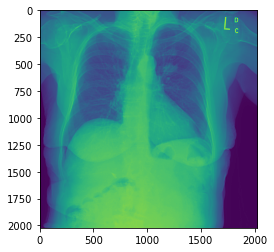

In [ ]:
# specify your image path
image_path = "/content/Sampledata_5A/Sample5_1.dcm"

ds = dicom.dcmread(image_path)
plt.imshow(ds.pixel_array)

In [ ]:
## DICOM: metadata info
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.307896144859643716158189196068
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', '']
(0008, 0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instance UID        

In [ ]:
# Viewing Field field tag name or tag number
print(ds.ManufacturerModelName)  # to print manufacturer model name
print(ds[0x10, 0x10])  # for patient name use  'print(ds.PatientName)' or tag number

Revolution XQi ADS_28.2
(0010, 0010) Patient's Name                      PN: ''


In [ ]:
# The field can be printed with part of file name
# for example, find tag name with ‘pat’ as part of name.
ds.dir("pat")

['DistanceSourceToPatient',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientIdentityRemoved',
 'PatientName',
 'PatientOrientation',
 'PatientSex']


**De-identification:**
According to the U.S. Health Insurance Portability and Accountability Act (HIPAA), and the European General Data Protection Regulations (GDPR), protected health information (e.g. patient identity) should not be released publicly. However, DICOM metadata (header)typically does contain some identifiable information about the patient. Hence, proper de-identification is necessary, which can be achieved by converting DICOM into other formats and removing the protected information from the saved file. 

# 2. **NIfTI**

## 2.1. **Introduction to NIfTI**

Even though DICOM is a very flexible and comprehensive system, this is a common problem in research environments, compounded by analysis methods and data constantly growing. The Neuroimaging Informatics Technology Initiative (NIfTI) format differs from DICOM because it is a very minimalistic format. The DICOM metadata is often removed or converted to NIfTI, which keeps the information about Voxel size and patient position. Completely removing DICOM metadata for open-source research could avoid privacy issues, but it would also eliminate some of the important information necessary for AI algorithms. Scientists in the neuroimaging community have primarily adopted the NIfTI format for storing and transferring clinical imaging data. They can mix and match image processing and analysis tools developed by different teams using the NIfTI format, widely adopted in neuroimaging research.



## 2.2. **DICOM to NIfTI Conversion**

DICOM is comprehensive and clinically oriented, whereas NIfTI is simple and easy for research. DICOM has a complicated format in order to support all the clinical scenarios and imaging devices that might be encountered in medicine. There have been different versions over time, and for novel and innovative methods, important information about the images may not yet have DICOM standards approved. This requires information to be stored in private tags, which makes it difficult for one tool to convert them into NIfTI. Nevertheless, converting images from the complex and image-per-file DICOM format to NIfTI format is crucial for efficient processing of the data. Several factors can disrupt this process ([source](https://doi.org/10.1016/j.jneumeth.2016.03.001)). 

According to its creators, the NIfTI format was initially intended to be a backward-compatible extension of the proprietary ANALYZE-7.5 file format. A DICOM file must first be sorted into different series before being converted. "DICOM series" refers to the collection of DICOM images (Instances) produced with the same image properties (there are some exceptions where related sets of images for each location are acquired together) covering a region of the body during an examination ([source](https://doi.org/10.1007/s10278-013-9657-9)). Most images are acquired as 2D (again, with a few exceptions), but when they are converted to NIfTI, usually all images are stacked together to make 3D volumetric data. The most reliable way to sort the series of DICOM images is to find the Series UID, as that should be globally unique--no other image should have that Series UID. Some of the popular DICOM to NIfTI conversion tools are [MRIConverter](https://lcni.uoregon.edu/downloads/mriconvert), and [MRIcron](https://www.nitrc.org/projects/mricron), whereas [dcm2nii](https://people.cas.sc.edu/rorden/mricron/dcm2nii.html), Pydicom and SimpleITK are python libraries (example shown here) which directly convert and save DICOM into NIfTI format along with the important metadata about pixel size and geometry. [MRIcro](https://people.cas.sc.edu/rorden/mricro/mricro.html) software is not only used to convert DICOM to NIfTI, but it also converts ITK MetaImage, AFNI, Freesurfer, and bitmap images (PNG, JPEG, etc) into NIfTI. SimpleITK preserves the pixel resolution by default. However, pydicom and dcm2niix need pixel information when writing the data in NIfTI format. The spacing in pixels is enclosed in the affine matrix, 4x4 matrix, which is also saved in NIfTI format along with imaging data. NIfTI data cannot be saved as integers and even binary mask files need to be converted to ‘float32’ or ‘float64’ before saving them in NIfTI. In the next section, we will see more information on affine matrix.

An important task that these converters do is to identify the ‘Slice location’ tag in DICOM to determine where that slice is located. After getting all slice locations, the slices are then sorted by location in order to provide a correct 3D representation. **We note here that the file names for DICOM are completely arbitrary and cannot be relied upon to indicate patient, study, series, or location. You must look at the DICOM tags to get reliable information.**

In [ ]:
# Use SimpleITK or pydicom to convert DICOM into NIfTI. And nibabel can be used to work with NIfTI format
!pip install SimpleITK
!pip install nibabel
!pip install numpy

In [ ]:
## DICOM to NIfTI with SimpleITK/pydicom
import SimpleITK as sitk
import pydicom
import nibabel as nib
import numpy as np
import os

In [ ]:
dicom_path = "/content/Sampledata_5A/"

for each in os.listdir(dicom_path):
    if ".nii" not in each:
        print(each)
        imgObj = sitk.ReadImage(os.path.join(dicom_path, each))
        ndarray = sitk.GetArrayFromImage(imgObj)
        writeObj = sitk.GetImageFromArray(ndarray)
        writeObj.CopyInformation(imgObj)
        writer = sitk.ImageFileWriter()
        writer.SetFileName(dicom_path + each + ".nii.gz")
        writer.Execute(writeObj)
        print([each, "done"])

        # OR pydicom for reading dicom files
        # imgObj=pydicom.dcmread(filepath)
        # ndarray=imgObj.pixel_array
        # newImgObj=nib.Nifti1Image(ndarray,affine)
        # nib.save(newImgObj,dicom_path+each+'.nii.gz')

Sample5_1.dcm
['Sample5_1.dcm', 'done']


## 2.3. **Working with NIfTI**

The NIfTI format can save header and image data separately, though typically they are together in 1 file. NiBabel is commonly used to read NIfTI images and also to write images in NIfTI format using Python (‘import nibabel’). NIfTI files typically end with the extension ‘.nii’ and they can be compressed with gzip (that extension is ‘.nii.gz’). There are ‘NIfTI-1’ and ‘NIfTI-2’ formats and the latter allows storage of more data. A Python script on how to load and write NIfTI files, extract header information, and extract affines can be found on the [NiBabel website](https://nipy.org/nibabel/nifti_images.html) and some of them are also listed here.

In [ ]:
## Working with NIfTI
# Import nibabel, load NIfTI and extract header information

Nifti_path = "/content/Sampledata_5A/"
example_ni1 = os.path.join(Nifti_path, "Sample5_1.dcm.nii.gz")
n1_img = nib.load(example_ni1)

# NIfTI header
n1_header = n1_img.header
print(n1_header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [   3 2022 2022    1    1    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : -0.0
qoffset_y       : -0.0
qoffset_z       : 0.0
srow_x          : [-1.  0.  0. -0.]
srow_y   

In [ ]:
# To save array in NIfTI format, it also need affine property to hold it's spatial resolution
# If data stored is in bitmap format, it may not have affine but to save them in NIfTI format, one may create an identity affine matrix.
# 'affine1 = np.eye(4)'

# Save NIfTI after data processing.
affine1 = n1_img.affine
data = n1_img.get_fdata()
# Do normalization or some data processing and save output data.
data2 = nib.Nifti1Image(data, affine1)
nib.save(data2, Nifti_path + "NIfTI_processed.nii.gz")

# 3. **DICOM/NIfTI Conversion to 2D images**

DICOM or NIfTI images often get converted to 2D image format when used by machine learning models. The 2D machine learning models can be fed with 2D images with a single channel of grayscale intensity or 3 channel RGB image. It’s easy to feed data into PyTorch-based machine learning models if the data format is a series of 2D bitmap images (i.e. jpeg, png, tiff, etc.) Photographic images are also present in a 2D image format and are used in machine learning for transfer learning algorithms. These data need to be fed into the models in the same way. Bitmap images can be easily visualized across different platforms with the native image viewer software of the system. A Python script to convert DICOM and NIfTI to bitmap images can be found here.

In [ ]:
## Convert the DICOM into png/jpg images
import pydicom as dicom
from PIL import Image

# specify your image path
dicom_image = "/content/Sampledata_5A/Sample5_1.dcm"
ds = dicom.dcmread(dicom_image)

imdata = ds.pixel_array.astype("float32")
print(imdata.shape)
print("max=", np.max(imdata))
print("min=", np.min(imdata))

(2022, 2022)
max= 15563.0
min= 171.0


In [ ]:
# Normalize data if neccessary
data = (imdata / np.max(imdata)) * 255

print("Normalized Intensity=", np.min(data), np.max(data))
darray = data.astype("uint8")
im = Image.fromarray(darray)
im.convert("RGB")
im.save(os.path.join(dicom_image[: -len(".dcm")] + ".png"))

Normalized Intensity= 2.8018377 255.0


In [ ]:
## Convert the NIfTI into png/jpg images
import nibabel as nib
from PIL import Image

# specify your image path
Nifti_path = "/content/Sampledata_5A/Sample5_1.dcm.nii.gz"
img = nib.load(Nifti_path)  # read nii
img_fdata = img.get_fdata()

print(img_fdata.shape)
img_fdata2 = np.squeeze(img_fdata)
print(img_fdata2.shape)

(2022, 2022, 1)
(2022, 2022)


In [ ]:
# Normalize data if neccessary
data2 = (img_fdata2 / np.max(img_fdata2)) * 255
print("Normalized Intensity=", np.min(data2), np.max(data2))

# save in jpg format
darray2 = data2.astype("uint8")
im2 = Image.fromarray(darray2)
im2.convert("RGB")
im2.save(os.path.join(Nifti_path[: -len(".dcm.nii.gz")] + ".jpg"))
print("Nifti file saved in jpg format")

Normalized Intensity= 2.801837691961704 255.0
Nifti file saved in jpg format


# 4. **Image formats Beyond DICOM and NIfTI**

There are a few other imaging formats other than DICOM and NIfTI that are occasionally used. These formats are used for non-medical images like photographs and enjoy much greater compatibility with non-medical tools.

[JPEG](https://doi.org/10.2345/0899-8205-43.2.131) (Joint Photographic Experts Group): JPEG is a file format developed by the Joint  Photographic Experts Group. The JPEG format supports both lossless (this is reversible--the image obtained after compression and decompression is mathematically identical to the original image) and lossy (irreversible) compression. Lossy compression is used in standard JPEG. The operator can control the ‘quality’ which in turn impacts the amount of storage used. The resulting image will not be mathematically identical to the original, but with an appropriate quality factor, the difference will not be visually significant. The appropriate quality factor depends on the image and use case, so experimentation is usually required, but values around 90 are usually acceptable. JPEG 2000 is another version that offers lossless compression and can achieve higher compression ratios for the same image quality but requires more computing power.

[TIFF](https://doi.org/10.2345/0899-8205-43.2.131) (Tagged Image File Format): TIFF supports both lossy and lossless compression. It is popular for publication because it specifies the ‘Dots Per Inch’ which is important for print publication but is not relevant for online publication.

[PNG](https://doi.org/10.2345/0899-8205-43.2.131) (Portable Network Graphics): This format allows for lossless compression. It was one of the first formats to support 16-bit grayscale images, and therefore is popular in medical imaging since many modalities are also 16-bit grayscale.

[GIF](https://doi.org/10.2345/0899-8205-43.2.131) (Graphics Interchange Format): This was one of the first imaging formats. However, it is no longer widely used. It offers a restricted set of functionality and ineffective compression. It is widely used for websites and offers lossless compression and transparency.

---

##***Feedback***

*Now that you have completed this chapter, we would be very grateful if you spend a few minutes of your time to answer a short survey about this chapter. We highly value your feedback and will do our best to leverage this to improve our educational content and/or strategies.*

[Click here to begin the survey!](https://docs.google.com/forms/d/e/1FAIpQLSddhdaAmeHmrKKRNXCLIQH6_mnIC3KR7XlDIVWGt3FSQhPDhQ/viewform)